<a href="https://www.kaggle.com/code/ayafnabih/airbnb-eda?scriptVersionId=249056497" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


# **What is Airbnb?** 

Airbnb is an online marketplace that connects people looking to rent out their homes with those looking for accommodations, typically for short-term stays. It was founded in 2008 and has grown into one of the most popular platforms for vacation rentals and unique lodging experiences around the world.

### Key Features of Airbnb:
- **Hosts**: Individuals or businesses who list their properties (apartments, houses, rooms, etc.) on the platform for rent.
- **Guests**: Travelers who book stays through the platform.
- **Listings**: Each Airbnb property includes photos, descriptions, pricing, availability, amenities, and reviews from past guests.
- **Ratings & Reviews**: Both guests and hosts rate each other after a stay to build trust in the community.
- **Search & Booking**: Users can search for accommodations by location, price, amenities, dates, and more.

The dataset  — [New York City Airbnb Open Data on Kaggle](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data) — provides information about Airbnb listings in NYC, including:
- Location (neighborhood, borough, coordinates)
- Price per night
- Type of room (entire home/apartment, private room, shared room)
- Number of minimum nights
- Number of reviews
- Availability

This data is often used for analysis in data science projects, such as:
- Price prediction
- Popular neighborhood analysis
- Market demand trends
- Host behavior patterns

Would you like help analyzing this dataset or building a project around it?

# **Explore the Data**

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px

In [3]:
df = pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [4]:
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
df.head(4).T

,0,1,2,3
id,2539,2595,3647,3831
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone
host_id,2787,2845,4632,4869
host_name,John,Jennifer,Elisabeth,LisaRoxanne
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill
latitude,40.64749,40.75362,40.80902,40.68514
longitude,-73.97237,-73.98377,-73.9419,-73.95976
room_type,Private room,Entire home/apt,Private room,Entire home/apt
price,149,225,150,89


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
pd.options.display.float_format = "{:,.2f}".format

In [8]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,"48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","48,895.00","38,843.00","48,895.00","48,895.00"
mean,"19,017,143.24","67,620,010.65",40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,"10,983,108.39","78,610,967.03",0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,"2,539.00","2,438.00",40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,"9,471,945.00","7,822,033.00",40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,"19,677,284.00","30,793,816.00",40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,"29,152,178.50","107,434,423.00",40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,"36,487,245.00","274,321,313.00",40.91,-73.71,"10,000.00","1,250.00",629.00,58.50,327.00,365.00


In [9]:
df.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [10]:
df.isnull().mean()*100

id                                0.00
name                              0.03
host_id                           0.00
host_name                         0.04
neighbourhood_group               0.00
neighbourhood                     0.00
latitude                          0.00
longitude                         0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
last_review                      20.56
reviews_per_month                20.56
calculated_host_listings_count    0.00
availability_365                  0.00
dtype: float64

In [11]:
df.name.sample(3)

41832    Private room for a single, couple or small family
15429         Near to Central Park and 1 ride to Times Sq!
3790                      Duplex PH 2 bedLoft Williamsburg
Name: name, dtype: object

In [12]:
df.host_id.nunique()

37457

In [13]:
df.host_id.value_counts().nlargest(10)

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: count, dtype: int64

In [14]:
df.drop(['id','name','host_name'],axis=1,inplace=True)

In [15]:
df.head(4).T

,0,1,2,3
host_id,2787,2845,4632,4869
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill
latitude,40.65,40.75,40.81,40.69
longitude,-73.97,-73.98,-73.94,-73.96
room_type,Private room,Entire home/apt,Private room,Entire home/apt
price,149,225,150,89
minimum_nights,1,1,3,1
number_of_reviews,9,45,0,270
last_review,2018-10-19,2019-05-21,NaN,2019-07-05


# **Pandas Profiling**

In [16]:
#pip install pandas-profiling
#pip install ydata-profiling

In [17]:
#pip install ydata-profiling --upgrade

In [18]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df)
profile.to_file("output.html") # or profile.to_notebook_iframe() 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# **Handiling Missing Values**

In [19]:
df.isnull().mean() *100

host_id                           0.00
neighbourhood_group               0.00
neighbourhood                     0.00
latitude                          0.00
longitude                         0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
last_review                      20.56
reviews_per_month                20.56
calculated_host_listings_count    0.00
availability_365                  0.00
dtype: float64

In [20]:
df[df.last_review.isnull()].head(5).T

,2,19,26,36,38
host_id,4632,17985,26394,7355,45445
neighbourhood_group,Manhattan,Manhattan,Manhattan,Brooklyn,Brooklyn
neighbourhood,Harlem,East Harlem,Inwood,Bedford-Stuyvesant,Flatbush
latitude,40.81,40.80,40.87,40.69,40.64
longitude,-73.94,-73.95,-73.93,-73.94,-73.96
room_type,Private room,Entire home/apt,Private room,Private room,Private room
price,150,190,80,35,150
minimum_nights,3,7,4,60,1
number_of_reviews,0,0,0,0,0
last_review,NaN,NaN,NaN,NaN,NaN


In [21]:
df.reviews_per_month.fillna(0,inplace=True)
df.last_review = pd.to_datetime(df.last_review)

<ipython-input-21-f81b6b10eedd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.reviews_per_month.fillna(0,inplace=True)


In [22]:
df.last_review.min() , df.last_review.max()

(Timestamp('2011-03-28 00:00:00'), Timestamp('2019-07-08 00:00:00'))

In [23]:
df.last_review.fillna(df.last_review.min() ,inplace=True)

<ipython-input-23-b6866243290e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.last_review.fillna(df.last_review.min() ,inplace=True)


In [24]:
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# **Neighbourhood Analysis**

In [25]:
# Explore categorical values
cat_cols = df.select_dtypes(include='object').columns.tolist()

In [26]:
for col in cat_cols:
    print(f'{col} : {df[col].nunique()}')

neighbourhood_group : 5
neighbourhood : 221
room_type : 3


In [27]:
# Explore neighbourhood_group
df.neighbourhood_group.value_counts()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

In [28]:
nhg_pct = df.neighbourhood_group.value_counts(normalize = True)
nhg_pct

neighbourhood_group
Manhattan       0.44
Brooklyn        0.41
Queens          0.12
Bronx           0.02
Staten Island   0.01
Name: proportion, dtype: float64

In [29]:
px.pie(nhg_pct, values=nhg_pct.values, names=nhg_pct.index, title='Neighbourhood Group')

In [30]:
df.groupby(['neighbourhood_group','room_type'])['price'].mean()

neighbourhood_group  room_type      
Bronx                Entire home/apt   127.51
                     Private room       66.79
                     Shared room        59.80
Brooklyn             Entire home/apt   178.33
                     Private room       76.50
                     Shared room        50.53
Manhattan            Entire home/apt   249.24
                     Private room      116.78
                     Shared room        88.98
Queens               Entire home/apt   147.05
                     Private room       71.76
                     Shared room        69.02
Staten Island        Entire home/apt   173.85
                     Private room       62.29
                     Shared room        57.44
Name: price, dtype: float64

In [31]:
df.groupby(['neighbourhood_group','room_type'])['price'].mean().sort_values(ascending = False)

neighbourhood_group  room_type      
Manhattan            Entire home/apt   249.24
Brooklyn             Entire home/apt   178.33
Staten Island        Entire home/apt   173.85
Queens               Entire home/apt   147.05
Bronx                Entire home/apt   127.51
Manhattan            Private room      116.78
                     Shared room        88.98
Brooklyn             Private room       76.50
Queens               Private room       71.76
                     Shared room        69.02
Bronx                Private room       66.79
Staten Island        Private room       62.29
Bronx                Shared room        59.80
Staten Island        Shared room        57.44
Brooklyn             Shared room        50.53
Name: price, dtype: float64

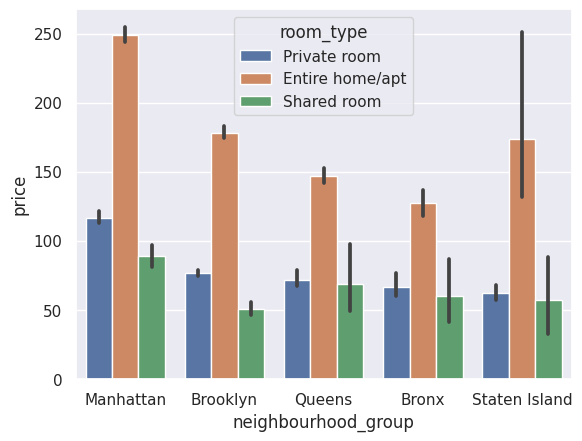

In [32]:
sns.barplot(x='neighbourhood_group', y='price', hue='room_type', data=df, order=df.neighbourhood_group.value_counts().index);

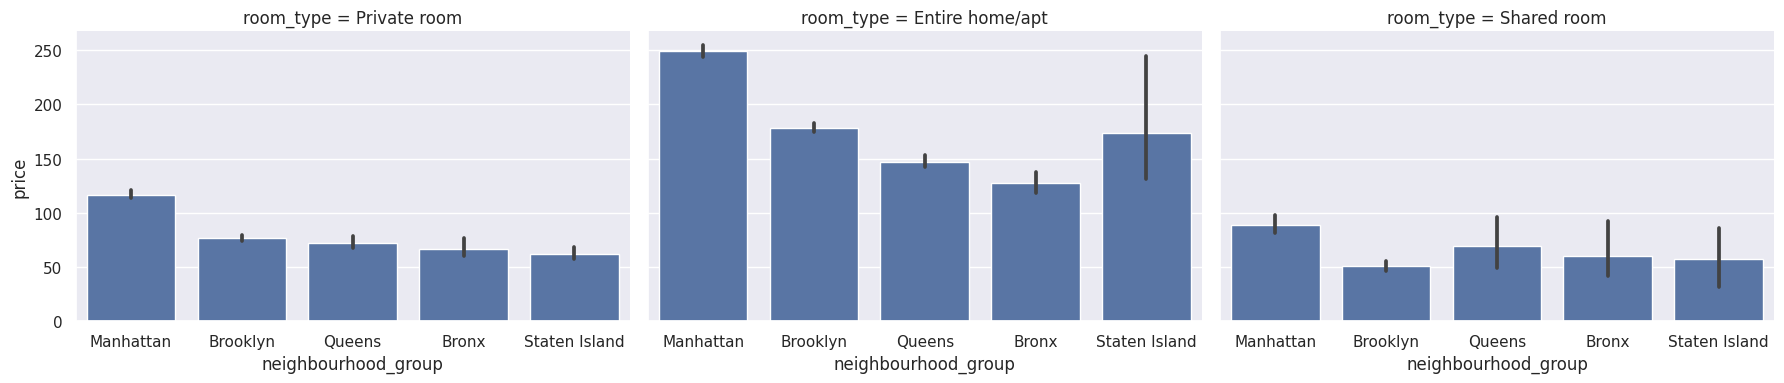

In [33]:
# facetgrid
g = sns.FacetGrid(df, col='room_type', height=4, aspect=1.5, palette='Set1')
g.map(sns.barplot, 'neighbourhood_group', 'price', order=df.neighbourhood_group.value_counts().index); 

In [34]:
# facetgrid plotly
fig = px.histogram(df,
       x='neighbourhood_group', 
       y='price', color='room_type',
       facet_col='room_type', 
       facet_col_wrap=3,
       category_orders={'neighbourhood_group': df.neighbourhood_group.value_counts().index},
       histfunc='avg')
fig.show()

In [35]:
pd.crosstab(index = df.neighbourhood_group, columns = df.room_type, values = df.price, aggfunc='mean')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.51,66.79,59.80
Brooklyn,178.33,76.50,50.53
Manhattan,249.24,116.78,88.98
Queens,147.05,71.76,69.02
Staten Island,173.85,62.29,57.44


In [36]:
nh_group_room = pd.pivot_table(df, index='neighbourhood_group', columns='room_type', values='price', aggfunc='mean')
nh_group_room

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.51,66.79,59.80
Brooklyn,178.33,76.50,50.53
Manhattan,249.24,116.78,88.98
Queens,147.05,71.76,69.02
Staten Island,173.85,62.29,57.44


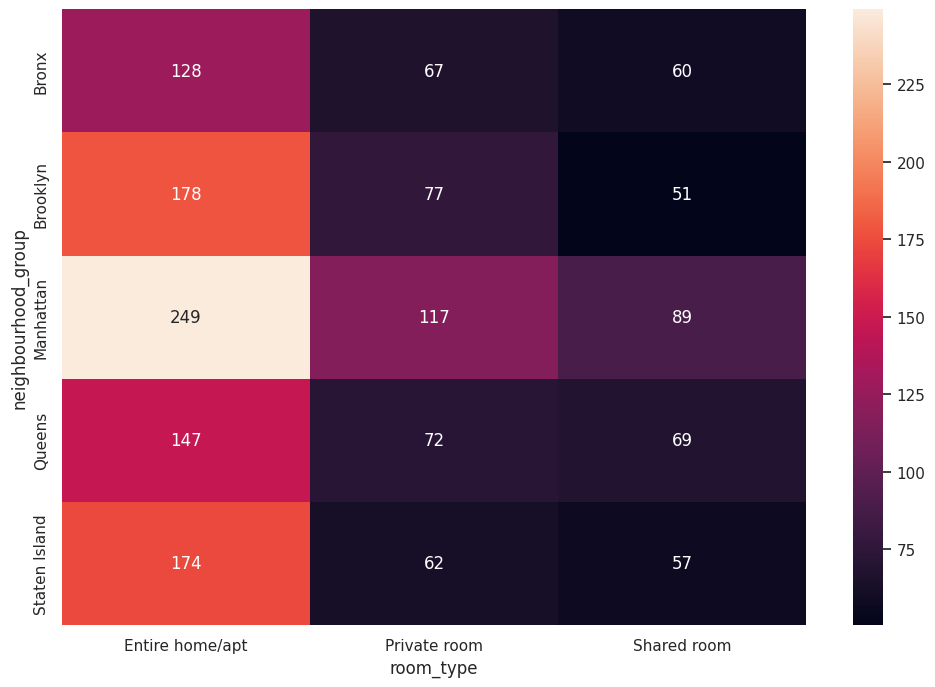

In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(nh_group_room, annot=True, fmt='.0f');

* The most expensive neighbourhood: `Manhattan`, then `Brooklyn` (`Entire home/apt or Private room`)
* The least expensive neighbourhood: `Brooklyn` (`Shared room`)
                
      > In general you can specify the room type  first, if it has high priority, then compare the prices of the neighbourhoods. Or, you can specify the neighbourhood first, if it has high priority, then compares the price of the room types.


**Task 1: Try Taking Median for "Price" instead of Mean in Aggregation**

In [38]:
df.groupby(['neighbourhood_group','room_type'])['price'].median().sort_values(ascending = False)

neighbourhood_group  room_type      
Manhattan            Entire home/apt   191.00
Brooklyn             Entire home/apt   145.00
Queens               Entire home/apt   120.00
Bronx                Entire home/apt   100.00
Staten Island        Entire home/apt   100.00
Manhattan            Private room       90.00
                     Shared room        69.00
Brooklyn             Private room       65.00
Queens               Private room       60.00
Bronx                Private room       53.50
Staten Island        Private room       50.00
Bronx                Shared room        40.00
Queens               Shared room        37.00
Brooklyn             Shared room        36.00
Staten Island        Shared room        30.00
Name: price, dtype: float64

In [39]:

median_df = df.groupby(['room_type', 'neighbourhood_group'])['price'].median().reset_index()

fig = px.bar(
    median_df,
    x='neighbourhood_group',
    y='price',
    color='room_type',
    facet_col='room_type',
    facet_col_wrap=3,
    category_orders={'neighbourhood_group': df['neighbourhood_group'].value_counts().index},
    title="Median Price by Neighbourhood and Room Type"
)

fig.show()